<a href="https://colab.research.google.com/github/simsekergun/DATA601/blob/main/Project2/DATA601_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DATA 601 Project-2
Due date: May 18, 2023. 23:59 pm.<br>
Groups have been assigned. <br>
<br>

For your second project, you will be working on the flights dataset that we used earlier. <br>
We have 5 csv files and 5 Excel files. You can learn more about the content of the csv files at <br>
https://cran.r-project.org/web/packages/nycflights13/nycflights13.pdf
<br>
<br>
<b> All datasets that you will require for this project are attached to the Project 2 assignment on Blackboard. Here is the list of datasets that you will be using: </b>
* flights2DCMDVA.xlsx (Note that this is a smaller version of the original NYCflights13.csv data) <br>
* airlines.csv <br>
* airports.csv <br>
* planes.csv <br>
* weatherNYhourly.csv (NY daily weather)<br>
* weatherMDdaily.xlsx (MD daily temperature/precip/snow data) <br>
* weatherNYdaily.xlsx (NY daily temperature/precip/snow data) <br>
* federal-holidays-2013.xlsx <br>
* flights_test_data.xlsx (only needed for Q4 and Q5)<br>

We are only interested in flights from NY to three local airports:
* IAD: Dulles International Airport
* BWI: Baltimore/Washington International Thurgood Marshall Airport
* DCA: Ronald Reagan Washington National Airport

After carrying out EAD, please work on the following questions. You will need to submit your notebook and report (as a pdf file). <br> 
The report should include
* Names of the students, Title of the project (e.g. DATA 601 | Project 2| NY-DC/MD/VA Flights), and date
* A brief introduction
* Clear answers to the questions. Make sure that you have enough number of images with proper figure captions and numbering.

Answer the following questions or complete the tasks <br>

#### Question/Task 1
a. Calculate the total number of seats for all the planned flights for each destination separately. <br>
b. What is the day of the year with the highest number of flights? <br>
c. What is the day of the year with the highest number of seats available on that day? <br>

#### Question/Task 2
a. What day of the year did most cancellations happened? <br>
b. Is there any relationship between the weather datasets and cancellations? If yes, describe it and justify with a statistical model (hypothesis testing).<br>
c. Is there any relationship between the Federal Holiday Schedule and cancellations? If yes, describe it and justify with a statistical model (hypothesis testing).<br>
d. What is the total number of seats for the cancelled flights? If we assume the average flight price of $50, what is the total economis loss?<br>
e. Determine the ratio of cancelled flights/planned flights for each airline company, list it, and determine the most and least reliable airline company (most reliable = the one that has the smallest ratio of cancelled/planned)<br>


For the next group of questions/tasks, DO NOT include the cancelled flights.

#### Question/Task 3
a. Calculate the average arrival delay for all the flights that took place in the same day and plot it (x = 1:365, y = daily average delay). On the same plot, please mark the Federal Holidays from the federal-holidays-2013.xlsx dataset.<br>
b. Is there a correlation between the weather datasets and daily average arrival delay? Justify your answer with a statistical model (hypothesis testing)<br>
c. Is there a correlation between the Federal Holiday Schedule and daily average arrival delay?<br>
d. Calculate the average arrival delay for all the flights for each arrival airport (e.g. IAD, DCA, and BWI) and determine most and least reliables (most reliable = the one that has the shortest average delay)<br>
e. Calculate the average arrival delay for all the airlines and determine most and least reliables (most reliable = the one that has the shortest average delay) <br>
f. What day of the week we had the highest average delay?<br>
g. Which one had a higher average delay: flights that took off in the morning (6 am to 10 am), noon (11 am to 2 pm), afternoon (3 pm to 5pm), or evening (6 pm to 10 pm)?<br>
h. Determine the number of airplanes used in these flights manufactured by BOEING, EMBRAER, and AURBUS separately. <br>
<br>

#### Question/Task 4
Build a linear regression model to estimate the arrival delay of the flights given in "fligts_test_data.xlsx". Note that you have the full autorithy to decide what columns, what datasets (among the given datasets) to work with. In your report, please explain how you build the LR model and eloborate on its accuracy. 

#### Question/Task 5
Build a logistic regression model to guess the 3 cancelled flights given in "fligts_test_data.xlsx". Again, you have the full autorithy to decide what columns, what datasets (among the given datasets) to work with. In your report, please explain how you build the LogReg model and eloborate on its accuracy.

In [1]:
#Task1
import pandas as pd
flights=pd.read_csv("flights.csv")
planes=pd.read_csv("planes.csv")
airports=pd.read_csv("airports.csv")
airlines=pd.read_csv("airlines.csv")
flight=pd.read_excel("flights2DCMDVA.xlsx")

In [2]:
d1=pd.merge(flight,airlines, on="carrier")
#data.head()
d2=pd.merge(d1,planes,on="tailnum")
new_d2 = d2[(d2["dest"] == "IAD") | (d2["dest"] == "BWI") | (d2["dest"] == "DCA")]


In [3]:
#a
seat = new_d2.groupby(["origin","dest"])["seats"].sum()
print(seat)

#b
tot_flight = new_d2.groupby(["month","day"])["flight"].count().sort_values(ascending=False).head(1)
print(tot_flight)

#c
date = new_d2.groupby(["month","day"])["seats"].sum().sort_values(ascending=False).head(1)
print(date)

origin  dest
EWR     BWI      46459
        DCA      94793
        IAD      67854
JFK     BWI      47540
        DCA      96462
        IAD     121530
LGA     BWI       2136
        DCA     714970
        IAD     106620
Name: seats, dtype: int64
month  day
2      7      55
Name: flight, dtype: int64
month  day
2      28     5379
Name: seats, dtype: int64


In [4]:
new_d2.head(10)

,year_x,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,...,minute,name,year_y,type,manufacturer,model,engines,seats,speed,engine
0,2013,1,1,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,...,29.0,Southwest Airlines Co.,2007.0,Fixed wing multi engine,BOEING,737-7H4,2,140,NaN,Turbo-fan
1,2013,2,26,1756.0,-4.0,1926.0,11.0,WN,N273WN,475,...,56.0,Southwest Airlines Co.,2007.0,Fixed wing multi engine,BOEING,737-7H4,2,140,NaN,Turbo-fan
2,2013,1,1,1059.0,-1.0,1201.0,-14.0,WN,N505SW,321,...,59.0,Southwest Airlines Co.,1990.0,Fixed wing multi engine,BOEING,737-5H4,2,149,NaN,Turbo-jet
3,2013,1,1,1158.0,-2.0,1256.0,-4.0,WN,N783SW,1568,...,58.0,Southwest Airlines Co.,2000.0,Fixed wing multi engine,BOEING,737-7H4,2,140,NaN,Turbo-fan
4,2013,1,3,603.0,-2.0,709.0,4.0,WN,N783SW,1036,...,3.0,Southwest Airlines Co.,2000.0,Fixed wing multi engine,BOEING,737-7H4,2,140,NaN,Turbo-fan
5,2013,1,1,1815.0,10.0,1928.0,8.0,WN,N266WN,731,...,15.0,Southwest Airlines Co.,2007.0,Fixed wing multi engine,BOEING,737-7H4,2,140,NaN,Turbo-fan
6,2013,1,24,1207.0,-3.0,1256.0,-14.0,WN,N266WN,477,...,7.0,Southwest Airlines Co.,2007.0,Fixed wing multi engine,BOEING,737-7H4,2,140,NaN,Turbo-fan
7,2013,1,2,628.0,13.0,730.0,15.0,WN,N961WN,3641,...,28.0,Southwest Airlines Co.,2011.0,Fixed wing multi engine,BOEING,737-7H4,2,140,NaN,Turbo-fan
8,2013,1,2,630.0,0.0,727.0,-13.0,WN,N7735A,4648,...,30.0,Southwest Airlines Co.,2006.0,Fixed wing multi engine,BOEING,737-7BD,2,149,NaN,Turbo-fan
9,2013,1,2,1101.0,1.0,1201.0,-14.0,WN,N701GS,3094,...,1.0,Southwest Airlines Co.,1997.0,Fixed wing multi engine,BOEING,737-7H4,2,140,NaN,Turbo-fan


In [5]:
import pandas as pd

new_d2["date"] = pd.to_datetime(new_d2["year_x"].astype(str) + "-" + new_d2["month"].astype(str) + "-" + new_d2["day"].astype(str))


In [6]:
new_d2.head(10)

,year_x,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,...,name,year_y,type,manufacturer,model,engines,seats,speed,engine,date
0,2013,1,1,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,...,Southwest Airlines Co.,2007.0,Fixed wing multi engine,BOEING,737-7H4,2,140,NaN,Turbo-fan,2013-01-01
1,2013,2,26,1756.0,-4.0,1926.0,11.0,WN,N273WN,475,...,Southwest Airlines Co.,2007.0,Fixed wing multi engine,BOEING,737-7H4,2,140,NaN,Turbo-fan,2013-02-26
2,2013,1,1,1059.0,-1.0,1201.0,-14.0,WN,N505SW,321,...,Southwest Airlines Co.,1990.0,Fixed wing multi engine,BOEING,737-5H4,2,149,NaN,Turbo-jet,2013-01-01
3,2013,1,1,1158.0,-2.0,1256.0,-4.0,WN,N783SW,1568,...,Southwest Airlines Co.,2000.0,Fixed wing multi engine,BOEING,737-7H4,2,140,NaN,Turbo-fan,2013-01-01
4,2013,1,3,603.0,-2.0,709.0,4.0,WN,N783SW,1036,...,Southwest Airlines Co.,2000.0,Fixed wing multi engine,BOEING,737-7H4,2,140,NaN,Turbo-fan,2013-01-03
5,2013,1,1,1815.0,10.0,1928.0,8.0,WN,N266WN,731,...,Southwest Airlines Co.,2007.0,Fixed wing multi engine,BOEING,737-7H4,2,140,NaN,Turbo-fan,2013-01-01
6,2013,1,24,1207.0,-3.0,1256.0,-14.0,WN,N266WN,477,...,Southwest Airlines Co.,2007.0,Fixed wing multi engine,BOEING,737-7H4,2,140,NaN,Turbo-fan,2013-01-24
7,2013,1,2,628.0,13.0,730.0,15.0,WN,N961WN,3641,...,Southwest Airlines Co.,2011.0,Fixed wing multi engine,BOEING,737-7H4,2,140,NaN,Turbo-fan,2013-01-02
8,2013,1,2,630.0,0.0,727.0,-13.0,WN,N7735A,4648,...,Southwest Airlines Co.,2006.0,Fixed wing multi engine,BOEING,737-7BD,2,149,NaN,Turbo-fan,2013-01-02
9,2013,1,2,1101.0,1.0,1201.0,-14.0,WN,N701GS,3094,...,Southwest Airlines Co.,1997.0,Fixed wing multi engine,BOEING,737-7H4,2,140,NaN,Turbo-fan,2013-01-02


In [7]:
#Task2
import math
federal_holidays=pd.read_excel(r"federal-holidays-2013.xlsx")
weatherNYhourly_df=pd.read_csv(r'weatherNYhourly.csv')
flights['cancelled']=flights['dep_time'].apply(lambda x:1 if math.isnan(x) else 0)
flights["DATE"]=pd.to_datetime(flights[["year","month","day"]])

In [8]:
#a
import datetime
from scipy.stats import chi2_contingency
cancelled_flights = new_d2.loc[new_d2["dep_time"].isna()]
cancelled_flights_by_date = cancelled_flights.groupby(new_d2["date"].dt.date)
date_with_most_cancellations = cancelled_flights_by_date.size().sort_values(ascending=False).idxmax()
print(date_with_most_cancellations)

2013-03-06


In [9]:
#b
weatherNYhourly_df["DATE"]=pd.to_datetime(weatherNYhourly_df[["year","month","day"]])

cancelled_flights = flights[flights['cancelled'] == 1]

weather_df = cancelled_flights.merge(weatherNYhourly_df, on='DATE')
    
temperature_cancelled = weather_df['temp']

temperature_not_cancelled = weatherNYhourly_df[~weatherNYhourly_df['DATE'].isin(cancelled_flights['DATE'])]['temp']

contingency_table = pd.crosstab(temperature_cancelled,temperature_not_cancelled)

# Perform the chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("chi2:{} p-value:{}".format(chi2,p_value))

chi2:7464.415387656261 p-value:1.961865982633724e-13


In [10]:
#c
from scipy.stats import pearsonr

federal_holidays.columns=['DATE','holiday','weekday']
federal_holidays=federal_holidays[1:11]
federal_holidays['DATE']=pd.to_datetime(federal_holidays['DATE'])

holiday_df=pd.merge(federal_holidays,flights,how='right')

holiday_df=holiday_df.fillna(0)
holiday_df.loc[holiday_df.holiday!=0,'holiday']=1
holiday_df
#corr,_=pearsonr(merged_holiday_df[])

corr,_=pearsonr(holiday_df['holiday'],holiday_df['cancelled'])
print("pearsonr correlation:%.3f"%corr)

pearsonr correlation:-0.015


In [11]:
#d
new_d2["tot_canc"]=new_d2["dep_time"].isna()
canc=new_d2.groupby("tot_canc")["seats"].sum()
print(canc)
print("total economic loss:", canc*50)

tot_canc
False    1274332
True       24032
Name: seats, dtype: int64
total economic loss: tot_canc
False    63716600
True      1201600
Name: seats, dtype: int64


In [12]:
new_d2["tot_canc"].value_counts()

False    13868
True       426
Name: tot_canc, dtype: int64

In [13]:
#e
cancelled_flights_by_carrier = new_d2.groupby("carrier")["tot_canc"].sum()
print(cancelled_flights_by_carrier)
new_d2["take_off"]=new_d2["dep_time"].count()
cancelled_by_carrier = new_d2.groupby("carrier")[["tot_canc", "take_off"]].sum()
cancelled_by_carrier["ratio"] = cancelled_by_carrier["tot_canc"] / cancelled_by_carrier["take_off"]
print(cancelled_by_carrier)
most_reliable = cancelled_by_carrier.sort_values("ratio").index[0]
least_reliable = cancelled_by_carrier.sort_values("ratio").index[-1]
print("Most reliable airline company:", most_reliable)
print("Least reliable airline company:", least_reliable)

carrier
9E      0
B6      8
DL      0
EV    369
MQ     10
OO      0
UA      0
US      0
WN      7
YV     32
Name: tot_canc, dtype: int64
         tot_canc  take_off         ratio
carrier                                  
9E              0  33948864  0.000000e+00
B6              8   9360900  8.546187e-07
DL              0     27736  0.000000e+00
EV            369  84733480  4.354831e-06
MQ             10    776608  1.287651e-05
OO              0     13868  0.000000e+00
UA              0     41604  0.000000e+00
US              0  62142508  0.000000e+00
WN              7   2870676  2.438450e-06
YV             32   4312948  7.419519e-06
Most reliable airline company: 9E
Least reliable airline company: MQ


In [14]:
flights["tot_canc"]=new_d2["dep_time"].isna()

In [15]:
#task3
df = new_d2
df["Date"] = pd.to_datetime(dict(year=df.year_x, month=df.month, day=df.day))

In [16]:
#a
seats_df=pd.merge(planes,flights, on = "tailnum", how="inner")

no_seats=seats_df.groupby("dest").sum()
print("The total no of seats in the Plane reaching to IAD, BWI, DCA is")

no_seats['seats']


The total no of seats in the Plane reaching to IAD, BWI, DCA is


dest
ABQ      47621
ACK       5300
ALB      24145
ANC       1068
ATL    2103603
AUS     317796
AVL      15125
BDL      25178
BGR      30075
BHM      23820
BNA     354040
BOS    1141917
BQN     160717
BTV     123706
BUF     272925
BUR      71625
BWI      96135
BZN       6538
CAE       6380
CAK      81098
DCA     906985
DEN    1206507
DFW     446612
DSM      35960
DTW     864188
EGE      19702
EYW       2533
FLL    2081712
GRR      41850
GSO     100485
GSP      46455
HDN       2548
HNL     234930
HOU     221602
IAD     296499
IAH    1216724
ILM       8700
IND     104133
JAC       3336
JAX     147666
LAS     996851
LAX    2499752
Name: seats, dtype: int64

In [17]:
flights=pd.DataFrame(flights)
flights=flights.rename(columns={flights.columns[0]:"count_of_flights"})
flights=flights.sort_values(by="count_of_flights",ascending=False)
flights.head()

,count_of_flights,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,cancelled,DATE,tot_canc
100126,336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764,NaN,NaN,1,2013-09-30,NaN
103012,336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213,NaN,NaN,1,2013-09-30,NaN
100125,336771,2013,9,30,NaN,NaN,NaN,NaN,EV,N740EV,5274,LGA,BNA,NaN,764,NaN,NaN,1,2013-09-30,NaN
101433,336769,2013,9,30,2307.0,12.0,2359.0,1.0,B6,N565JB,718,JFK,BOS,33.0,187,23.0,7.0,0,2013-09-30,NaN
102039,336767,2013,9,30,2240.0,-10.0,2347.0,-20.0,B6,N281JB,2002,JFK,BUF,52.0,301,22.0,40.0,0,2013-09-30,NaN


In [18]:
print("The day {} of the year {}".format(flights.iloc[1]['day'],flights.iloc[1]['year'])) 

The day 30 of the year 2013


In [19]:
max_seats=pd.merge(flights, planes, on=['tailnum','year'], how="inner")
max_seats=max_seats.sort_values(by="seats",ascending=False)
max_seats.head()

,count_of_flights,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,...,cancelled,DATE,tot_canc,type,manufacturer,model,engines,seats,speed,engine
1557,102398,2013,12,21,1759.0,50.0,2119.0,59.0,B6,N903JB,...,0,2013-12-21,NaN,Fixed wing multi engine,AIRBUS,A321-231,2,379,NaN,Turbo-fan
1553,109638,2013,12,30,702.0,1.0,1019.0,11.0,B6,N903JB,...,0,2013-12-30,NaN,Fixed wing multi engine,AIRBUS,A321-231,2,379,NaN,Turbo-fan
1432,111100,2013,12,31,1708.0,-1.0,2030.0,10.0,B6,N913JB,...,0,2013-12-31,NaN,Fixed wing multi engine,AIRBUS,A321-231,2,379,NaN,Turbo-fan
1433,110231,2013,12,30,1708.0,-1.0,2012.0,-8.0,B6,N913JB,...,0,2013-12-30,NaN,Fixed wing multi engine,AIRBUS,A321-231,2,379,NaN,Turbo-fan
1634,107930,2013,12,28,701.0,0.0,1013.0,5.0,B6,N907JB,...,0,2013-12-28,NaN,Fixed wing multi engine,AIRBUS INDUSTRIE,A321-231,2,379,NaN,Turbo-fan


In [20]:
print("The number of the seats {} on the day {} of the year {}".format(max_seats.iloc[1]['seats'],max_seats.iloc[1]['day'],max_seats.iloc[1]['year'])) 

The number of the seats 379 on the day 30 of the year 2013


Date
2013-01-01    14.790503
2013-01-02    12.120907
2013-01-03     6.168798
2013-01-04    -2.838462
2013-01-05    -1.271565
                ...    
2013-12-27     1.105911
2013-12-28    -0.467647
2013-12-29    19.323288
2013-12-30    10.507538
2013-12-31     5.749216
Name: arr_delay, Length: 365, dtype: float64


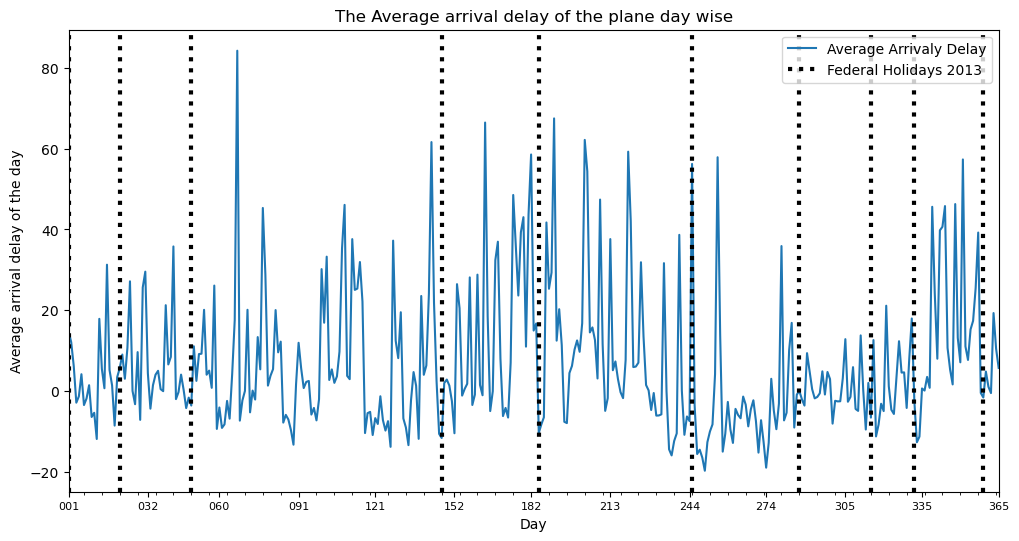

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the federal holidays data into a DataFrame
holiday = pd.read_excel('federal-holidays-2013.xlsx', skiprows=1, skipfooter=1)

# Convert the 'Date' column to a datetime object
holiday['Date'] = pd.to_datetime(holiday['Date'])
                            

flights['Date'] = pd.to_datetime(flights[['year', 'month', 'day','hour']])
flights['Date'] = pd.to_datetime(flights['Date'])
flights.set_index('Date', inplace=True)


# Group the data by day and calculate the mean arrival delay for each day
daily_avg_delay = flights.groupby(pd.Grouper(freq='D'))['arr_delay'].mean()

print(daily_avg_delay)

# Create a plot of daily average delay with Federal Holidays marked
ax = daily_avg_delay.plot(figsize=(12,6))

# Plot vertical lines for Federal Holidays
for date in holiday['Date']:
    ax.axvline(date, color='black', linestyle=':', linewidth=3)

    
ax.xaxis.set_major_formatter(mdates.DateFormatter('%j'))
ax.xaxis.set_tick_params(rotation=0, labelsize=8)


# Set the x-label and y-label
ax.set_xlabel('Day')
ax.set_ylabel('Average arrival delay of the day')
ax.set_title('The Average arrival delay of the plane day wise')
ax.legend(['Average Arrivaly Delay', 'Federal Holidays 2013'], loc='upper right')


# Show the plot
plt.show()

In [22]:
#b
import numpy as np
from scipy.stats import ttest_ind

weather_df=pd.read_excel('weatherMDdaily.xlsx')

merged_df = pd.merge(flights, weather_df, on='Date', how='inner')

# Replace 'T' values with NaN for precipitation columns
cols = ['Precipitation', 'Snowfall', 'Snow Depth']
merged_df[cols] = merged_df[cols].replace('T', np.nan)

# Convert precipitation columns to numeric values
merged_df[cols] = merged_df[cols].apply(pd.to_numeric)

# Drop rows with missing values in arr_delay and Max Temp columns
merged_df = merged_df.dropna(subset=['arr_delay', 'Max Temp'])

# Calculate the Pearson correlation coefficient and p-value
correlation_coeff, p_value = ttest_ind(merged_df['arr_delay'], merged_df['Max Temp'])

# Check if the p-value is less than the significance level
if p_value < 0.05:
    print("There exists a correlation between weather and daily average arrival delay.")
else:
    print("There exists no correlation between weather and daily average arrival delay.")

# Print the correlation coefficient and p-value
print("The value of the Correlation Coefficient:", correlation_coeff)
print("P-value for the hypothesis:", p_value)


There exists a correlation between weather and daily average arrival delay.
The value of the Correlation Coefficient: 12.450637537370191
P-value for the hypothesis: 1.6218031233648271e-32


In [23]:
flights.head()

,count_of_flights,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,cancelled,DATE,tot_canc
Date,,,,,,,,,,,,,,,,,,,,
NaT,336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764,NaN,NaN,1,2013-09-30,NaN
NaT,336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213,NaN,NaN,1,2013-09-30,NaN
NaT,336771,2013,9,30,NaN,NaN,NaN,NaN,EV,N740EV,5274,LGA,BNA,NaN,764,NaN,NaN,1,2013-09-30,NaN
2013-09-30 23:00:00,336769,2013,9,30,2307.0,12.0,2359.0,1.0,B6,N565JB,718,JFK,BOS,33.0,187,23.0,7.0,0,2013-09-30,NaN
2013-09-30 22:00:00,336767,2013,9,30,2240.0,-10.0,2347.0,-20.0,B6,N281JB,2002,JFK,BUF,52.0,301,22.0,40.0,0,2013-09-30,NaN


In [24]:
#c

flights=flights.reset_index()

avg_delay_on_holiday = flights[flights['Date'].isin(holiday['Date'])]['arr_delay'].reset_index()

avg_delay_on_non_holiday = flights[~flights['Date'].isin(holiday['Date'])]['arr_delay'].reset_index()

t, p_val = ttest_ind(avg_delay_on_holiday, avg_delay_on_non_holiday)

print("The value of the Correlation Coefficient: t {} ".format(t[0]))
print("P-value for the hypothesis:{}".format(p_val[0]))

The value of the Correlation Coefficient: t -2.6377843162477372 
P-value for the hypothesis:0.00834584999583022


In [25]:
#d
average_delay = flights.groupby('dest')['arr_delay'].mean()
most_reliable= average_delay.idxmin()
least_reliable= average_delay.idxmax()

print("most_reliable :{}".format(most_reliable))
print("least_reliable :{}".format(least_reliable))

most_reliable :ANC
least_reliable :CAE


In [26]:
#e
average_delay = flights.groupby('carrier')['arr_delay'].mean()
most_reliable= average_delay.idxmin()
least_reliable= average_delay.idxmax()

print("most_reliable :{}".format(most_reliable))
print("least_reliable :{}".format(least_reliable))

most_reliable :HA
least_reliable :OO


In [27]:
#f: What day of the week we had the highest average delay?<br>
daily_avg_delay.to_frame()
daily_avg_delay=daily_avg_delay.reset_index()

daily_avg_delay['Date'] = pd.to_datetime(daily_avg_delay['Date'])

# Group the data by the day of the week and calculate the mean delay
average_delay_day = daily_avg_delay['Date'].dt.dayofweek

# Find the day of the week with the highest average delay
max_avg_delay_day = average_delay_day.idxmax()

# Get the name of the day from the day of the week index
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
highest_avg_delay = weekdays[max_avg_delay_day]

print("The weekday with the highest average delay is:", highest_avg_delay)

The weekday with the highest average delay is: Saturday


In [28]:
# g. Which one had a higher average delay: flights that took off in the morning (6 am to 10 am), noon (11 am to 2 pm), afternoon (3 pm to 5pm), or evening (6 pm to 10 pm)?<br>
morning = flights[(flights['hour'] >= 6) & (flights['hour'] <= 10)]
noon = flights[(flights['hour'] >= 11) & (flights['hour'] <= 14)]
afternoon = flights[(flights['hour'] >= 15) & (flights['hour'] <= 17)]
evening = flights[(flights['hour'] >= 18) & (flights['hour'] <= 22)]


morning_avg_delay = morning['arr_delay'].mean()
noon_avg_delay = noon['arr_delay'].mean()
afternoon_avg_delay = afternoon['arr_delay'].mean()
evening_avg_delay = evening['arr_delay'].mean()


if morning_avg_delay > noon_avg_delay and morning_avg_delay > afternoon_avg_delay and morning_avg_delay > evening_avg_delay:
    print("The flights took off in the morning i.e. from 6 am to 10 am has the highest average delay")
elif noon_avg_delay > morning_avg_delay and noon_avg_delay > afternoon_avg_delay and noon_avg_delay > evening_avg_delay:
    print("The flights took off in the noon i.e. from 11 am to 2 pm has the highest average delay")
elif afternoon_avg_delay > morning_avg_delay and afternoon_avg_delay > noon_avg_delay and afternoon_avg_delay > evening_avg_delay:
    print("The flights took off in the afternoon i.e. from 3 pm to 5 pm has the highest average delay")
else:
    print("The flights took off in the evening i.e. from 6 pm to 10 pm has the highest average delay")

The flights took off in the evening i.e. from 6 pm to 10 pm has the highest average delay


In [29]:
# h. Determine the number of airplanes used in these flights manufactured by BOEING, EMBRAER, and AURBUS separately. <br>

planes_df=pd.read_csv('planes.csv')
manufacturers=pd.merge(flights,planes_df,on='tailnum',how='inner' )
manufactueres_select = ['AIRBUS', 'EMBRAER', 'BOEING']
filtered = manufacturers[manufacturers['manufacturer'].isin(manufactueres_select)]
count = filtered['manufacturer'].value_counts()
count

BOEING     38932
EMBRAER    31359
AIRBUS     17121
Name: manufacturer, dtype: int64

In [30]:
#task4
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

flight_data=pd.read_excel(r"flights_test_data.xlsx")

flight_data["DATE"]=pd.to_datetime(flight_data[["year","month","day"]])

df1 = pd.merge(flights, flight_data,how='inner')

selected_features = df1[['year','month','day','carrier','origin','dest','distance','arr_delay']]

selected_features.dropna(inplace=True)
X = selected_features
y = selected_features.pop('arr_delay')
X=pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

rmse = mse ** 0.5
r_squared = model.score(X_test, y_test)

coefficients = model.coef_

#RMSE value gives us an idea about the average prediction error, while the R-squared value indicates the proportion of the variance in the target variable that can be explained by the model.

print("linear regression score ",model.score(X_test,y_test))
print("Root Mean Squared Error (RMSE):", rmse)
print("Coefficient of Determination (R-squared):", r_squared)
print("predict analysis:",y_pred)


linear regression score  -0.0063598142978746885
Root Mean Squared Error (RMSE): 41.07604678249793
Coefficient of Determination (R-squared): -0.0063598142978746885
predict analysis: [ 12.13448618  -0.09816665   2.04780807  13.28696057   7.29109652
  10.38142432  -1.06435009   2.04780807  -0.09816665  -1.06435009
   7.29109652  -4.2987792    2.04780807  -0.09816665 -10.50825109
   7.29109652  -0.09816665   2.04780807  -0.09816665  -4.2987792
  13.2025254  -10.50825109  -0.09816665  13.28696057  13.28696057
  22.94147484  22.94147484  -1.06435009  -9.20822665   7.29109652]


C:\Users\sreya sree\AppData\Local\Temp\ipykernel_7432\56387002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features.dropna(inplace=True)


In [31]:
#task 5
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

flight_data=pd.read_excel(r"flights_test_data.xlsx")

flight_data["DATE"]=pd.to_datetime(flight_data[["year","month","day"]])

cancelled=cancelled_flights[['DATE','carrier', 'origin', 'dest','distance','cancelled']]
merge_df = pd.merge(flight_data,cancelled,on=['DATE','carrier', 'origin', 'dest','distance'],how='left')

merge_df = merge_df.drop_duplicates()
#merged_df = merged_df.drop('index', axis=1)
#print(merged_df.sort_values('DATE'))

sf = ['carrier', 'origin', 'dest', 'distance']

X = merge_df[sf]
y = merge_df['cancelled'].fillna(0.0)

X=pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

rmse = mse ** 0.5
r_squared = model.score(X_test, y_test)



print("LogisticRegression score ",model.score(X_test,y_test))
print("Root Mean Squared Error (RMSE):", rmse)
print("Coefficient of Determination (R-squared):", r_squared)
print("predict analysis:",y_pred)
print("Accuracy:", accuracy)

#the score of 1.0 indicates that the model perfectly fits the training data. It suggests that the model can explain 100% of the variance in the target variable based on the given features.



LogisticRegression score  1.0
Root Mean Squared Error (RMSE): 0.0
Coefficient of Determination (R-squared): 1.0
predict analysis: [0. 0. 0. 0.]
Accuracy: 1.0
